## Lista de Exercícios da Disciplina de Métodos Computacios em Engenharia – Primeira Unidade

### Hudson Artur de Lima Andrade – Engenharia Elétrica

1. (Valor: 1.5 pontos) - Ajuste os valores da tabela a uma equação do tipo y = ax^b. 
Saída do programa: Valores de a, b, e diagrama de dispersão com a curva de ajuste.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x =    [1.0,   2.0,  3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

y =    [100.0, 25.0, 11.1, 6.3, 4.0, 2.8, 2.0, 1.6, 1.2, 1.0]

ln_y = [4.6,   3.2,  2.4,  1.8, 1.3, 1.0, 0.7, 0.5, 0.2, 0.0]

<img src="a_&_b_questao_01.jpg">

In [3]:
a = 100

b = -2

In [4]:
z = np.polyfit(x, ln_y, 1)
p = np.poly1d(z)

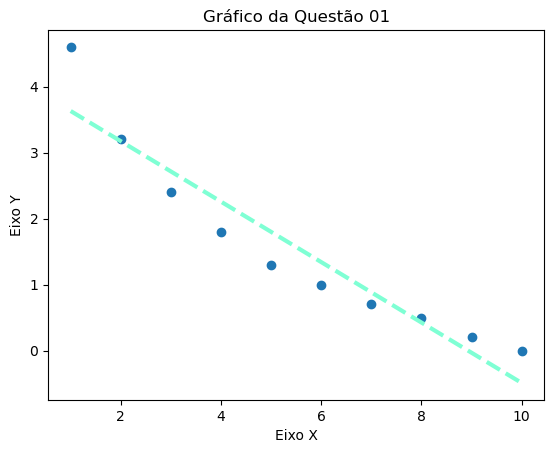

In [5]:
plt.scatter(x, ln_y)
plt.plot(x, p(x), color="aquamarine", linewidth=3, linestyle="--", label="Linha de Tendência")
plt.title('Gráfico da Questão 01')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

In [6]:
print('Valor de a:', a)
print('Valor de b:', b)

Valor de a: 100
Valor de b: -2


2. Ajuste o índice de refração, no intervalo [0.5, 1.1], com incrementos em λ iguais a 0.1, pela equação dada. Saída do programa: Valores de a, b, curvas de n(λ) exata e ajustada e valor do erro relativo em λ = 0.98.
